# Fetch data from Kaggle

---

You first need to download to your machine a j**son file (authentication token)** from Kaggle for authentication.


The process is:
  1. From the site header, click on your user profile picture, then on **“Account”** from the dropdown menu. This will take you to your account settings

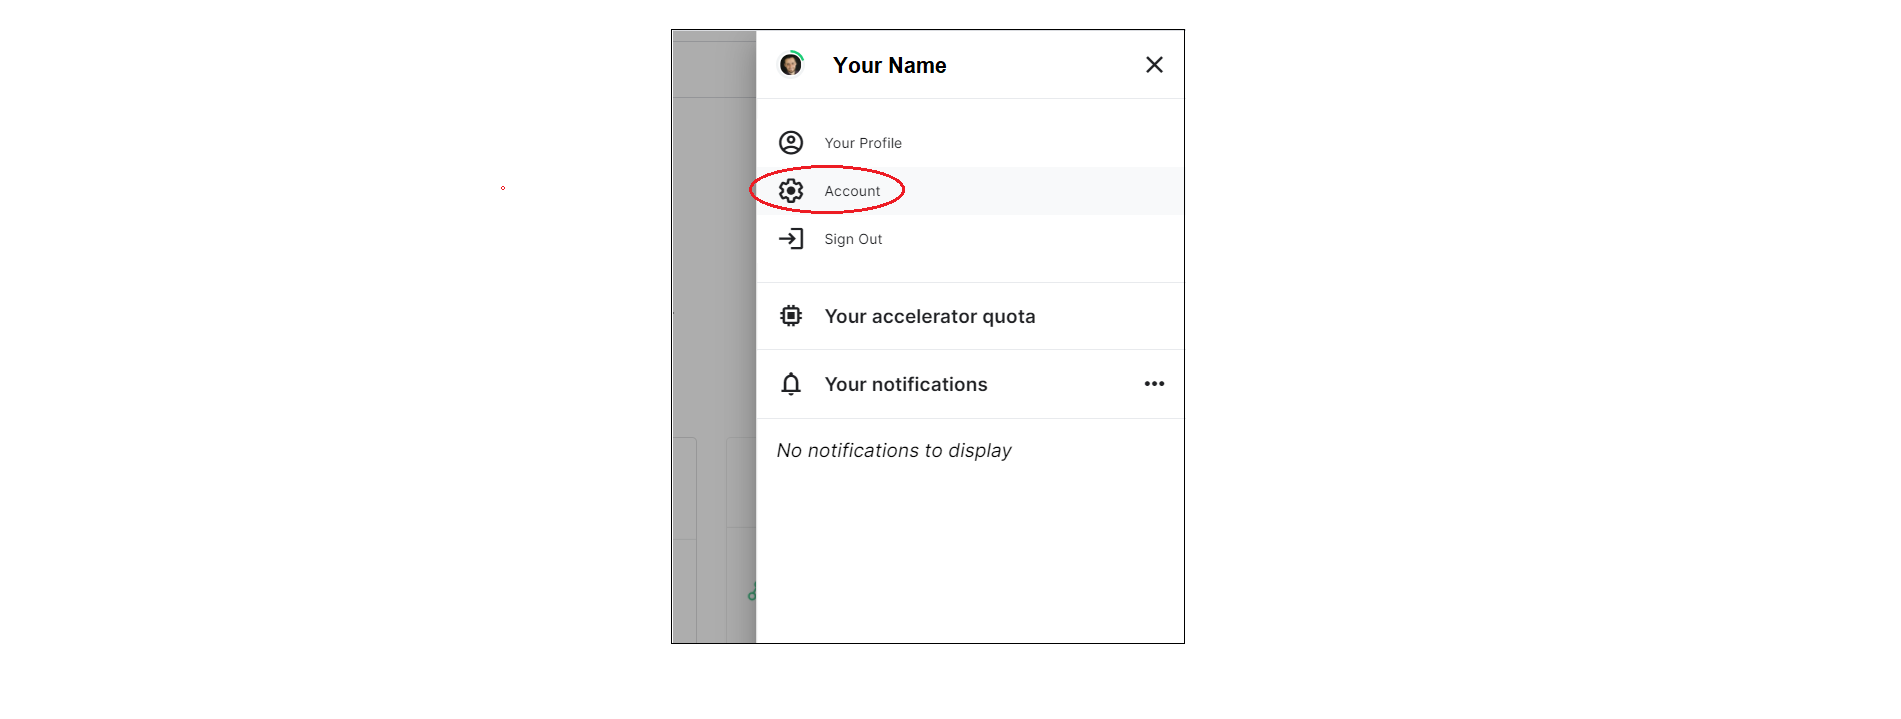

2. Scroll down to the section of the page called **API** 


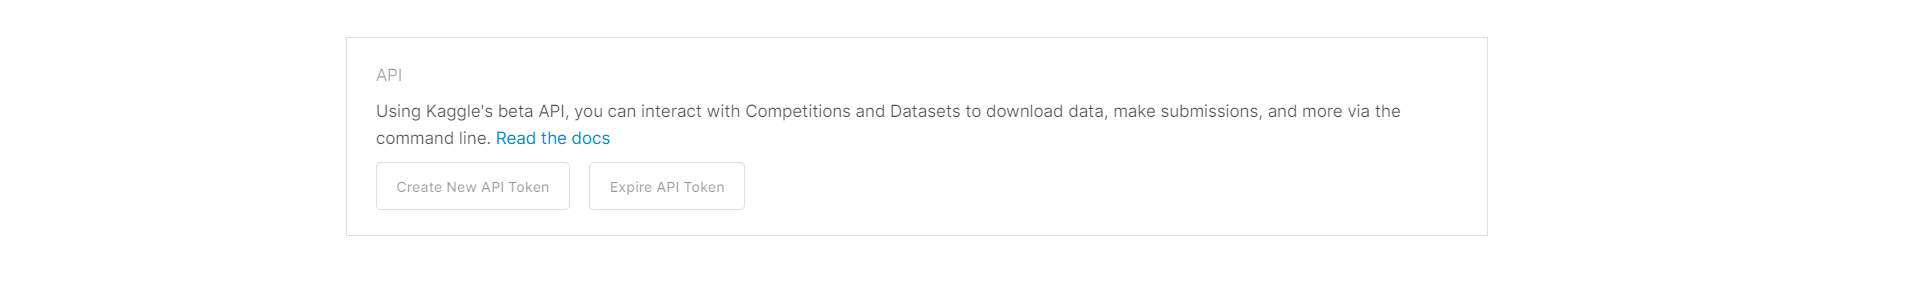

3. Click **Expire API Token** to remove previous tokens
4. To create a new token, click on the “**Create New API Token**” button. It will generate a fresh authentication token and will download **kaggle.json file** on your machine.

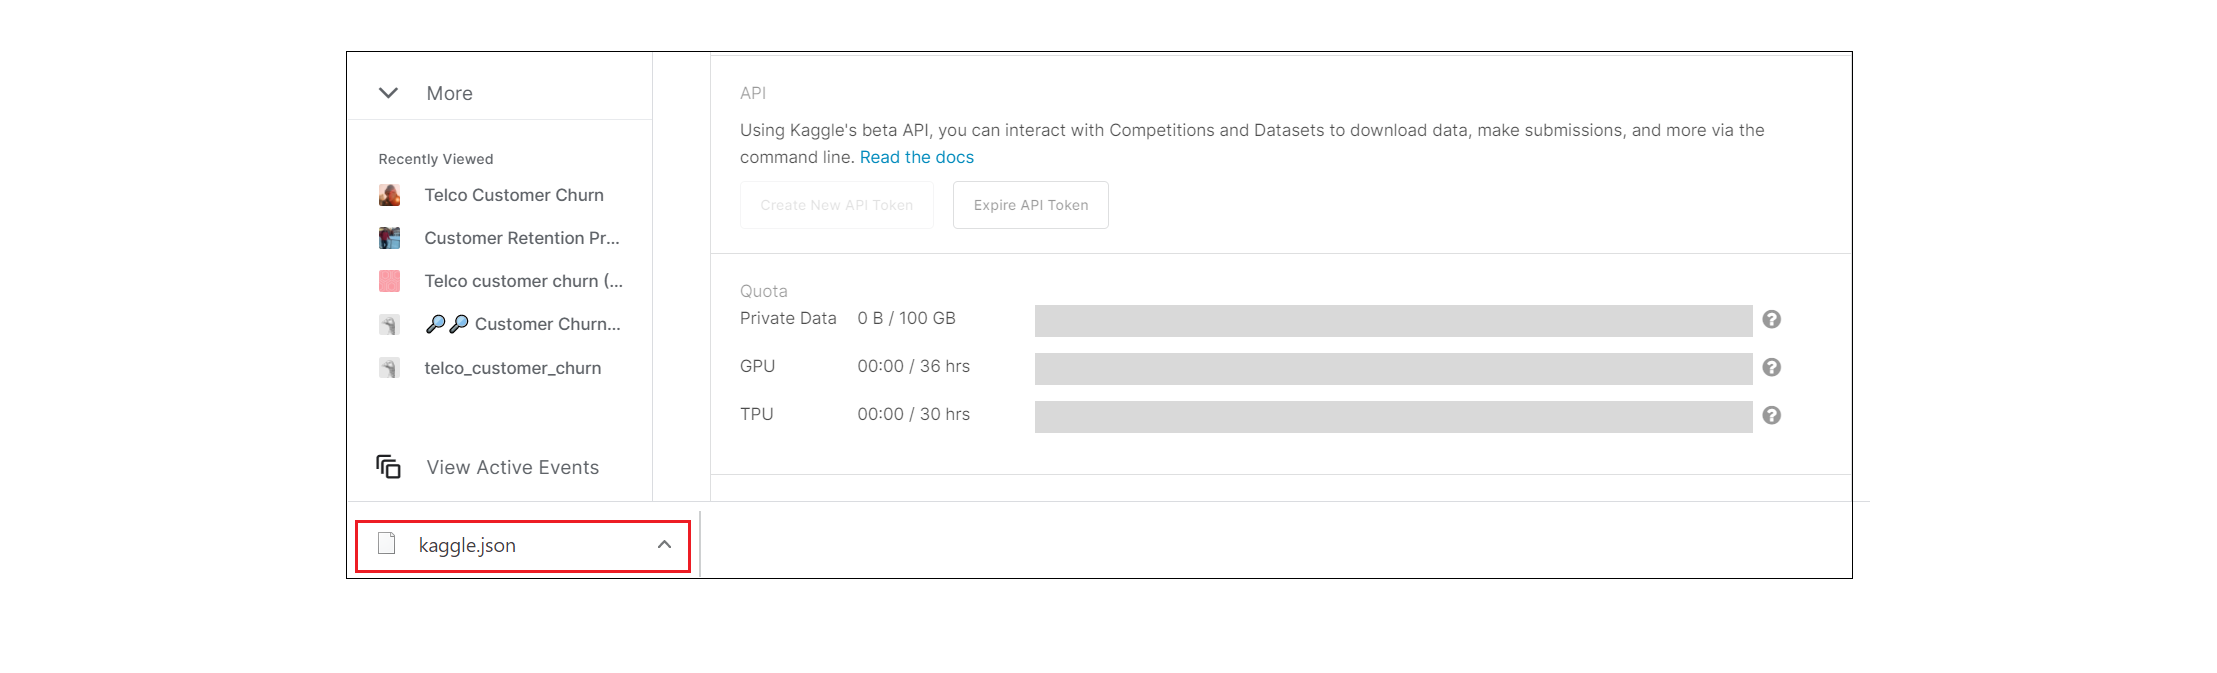

In case you find any difficulty, go to "Authentication" section in this [link](https://www.kaggle.com/docs/api).



* In the end, you should have this file saved locally in your machine. **Please make sure this file is named as kaggle.json**


---

# **Data Collection**

## Objectives

* Fetch data from Kaggle and prepare it for further processes

## Inputs

*   Kaggle JSON file - authentication token 

## Outputs

* Generate Dataset: inputs/datasets/malaria_dataset

## Additional Comments | Insights | Conclusions


* No comments


---

# Import packages

In [ ]:
import numpy
import os

## Change the working directory

In [ ]:
current_dir = os.getcwd()
current_dir

In [ ]:
os.chdir('/workspace/WalkthroughProject01')
print("You set a new current directory")

In [ ]:

current_dir = os.getcwd()
current_dir

# Install Kaggle

In [ ]:
# install kaggle package
!pip install kaggle

---

Run the cell below **to change kaggle configuration directory to current working directory and permission of kaggle authentication json**

In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = os.getcwd()
! chmod 600 kaggle.json

* Get the dataset path from the [Kaggle url](https://www.kaggle.com/codeinstitute/malaria-cell-classification). When you are viewing the dataset at Kaggle, check what is after https://www.kaggle.com/ . You should copy that at KaggleDatasetPath.
* Set your destination folder.

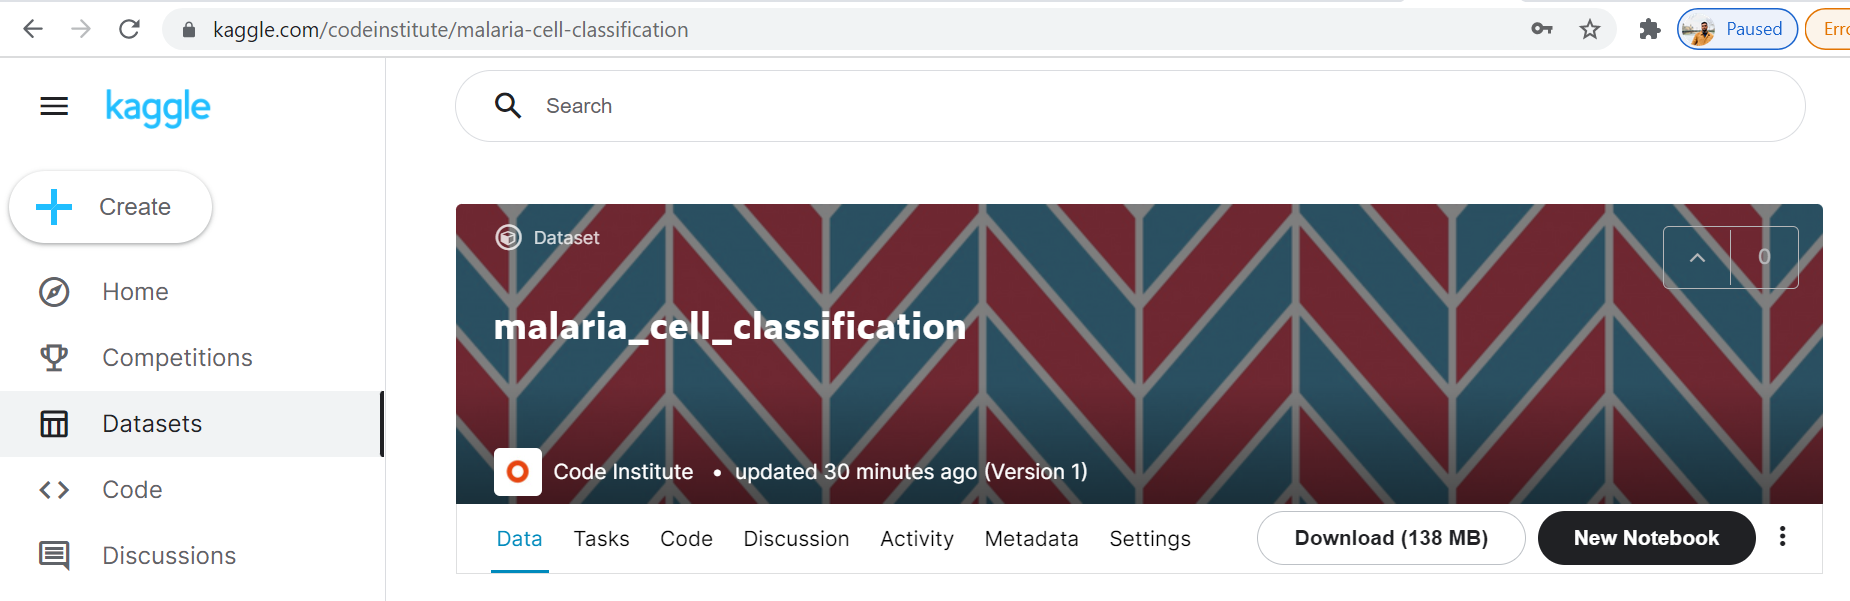

Set Kaggle Dataset and Download it

In [ ]:
KaggleDatasetPath = "gyanshashwat1611/malaria-cell-classification"
DestinationFolder = "inputs/malaria_dataset"   
! kaggle datasets download -d {KaggleDatasetPath} -p {DestinationFolder}

Unzip the downloaded file, delete the zip file

In [ ]:
import zipfile
with zipfile.ZipFile(DestinationFolder + '/malaria-cell-classification.zip', 'r') as zip_ref:
    zip_ref.extractall(DestinationFolder)

os.remove(DestinationFolder + '/malaria-cell-classification.zip')

---

# Data Preparation

---

## Data cleaning

### Check and remove non images files

In [ ]:
def remove_non_image_file(my_data_dir):
    image_extension = ('.png', '.jpg', '.jpeg')
    folders = os.listdir(my_data_dir) 
    for folder in folders:
        files = os.listdir(my_data_dir + '/' + folder)
        
            #print(files)
        i = []
        j = []
        for given_file in files:
            if not given_file.lower().endswith(image_extension):
                file_location = my_data_dir + '/' + folder + '/' + given_file
                os.remove(file_location) # remove non image file
                i.append(1)
            else:
                j.append(1)
                pass
        print(f"Folder: {folder} - has image file",len(j))
        print(f"Folder: {folder} - has non-image file",len(i))
    
    

In [ ]:
remove_non_image_file(my_data_dir='inputs/malaria_dataset/cell_images')

## Split train validation test set

In [ ]:
import os
import shutil
import random
import joblib

def split_train_validation_test_images(my_data_dir, train_set_ratio, validation_set_ratio, test_set_ratio):
  
  if train_set_ratio + validation_set_ratio + test_set_ratio != 1.0:
    print("train_set_ratio + validation_set_ratio + test_set_ratio should sum 1.0")
    return

  # gets classes labels
  labels = os.listdir(my_data_dir) # it should get only the folder name
  if 'test' in labels:
    pass
  else: 
    # create train, test folders with classess labels sub-folder
    for folder in ['train','validation','test']:
      for label in labels:
        os.makedirs(name=my_data_dir+ '/' + folder + '/' + label)

    for label in labels:

      files = os.listdir(my_data_dir + '/' + label)
      random.shuffle(files)

      train_set_files_qty = int(len(files) * train_set_ratio)
      validation_set_files_qty = int(len(files) * validation_set_ratio)

      count = 1
      for file_name in files:
        if count <= train_set_files_qty:
          # move given file to train set
          shutil.move(my_data_dir + '/' + label + '/' + file_name,
                      my_data_dir + '/train/' + label + '/' + file_name)
          

        elif count <= (train_set_files_qty + validation_set_files_qty ):
          # move given file to validation set
          shutil.move(my_data_dir + '/' + label + '/' + file_name,
                      my_data_dir + '/validation/' + label + '/' + file_name)

        else:
          # move given file to test set
          shutil.move(my_data_dir + '/' + label + '/' + file_name,
                  my_data_dir + '/test/' +label + '/'+ file_name)
          
        count += 1

      os.rmdir(my_data_dir + '/' + label)
    

Conventionally,
* The training set is divided into 0.70 ratio of data.
* The validation set is divided into 0.10 ratio of data.
* The test set is divided into 0.20 ratio of data.

In [ ]:
split_train_validation_test_images(my_data_dir = f"inputs/malaria_dataset/cell_images",
                        train_set_ratio = 0.7,
                        validation_set_ratio=0.1,
                        test_set_ratio=0.2
                        )

---

# Congratulations

---